# EXPLORATORY DATA ANALYSIS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pharm_path = '/content/drive/MyDrive/Pharm-Dataset/data pharm 2.xlsx'

### IMPORT ALL NECESSARY LIBRARIES

In [6]:
# numerical and tables
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

1. **LOAD THE DATASET**

In [7]:
pharm_df = pd.read_excel(pharm_path)

In [8]:
pharm_df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


2. **INFORMATION OF THE DATASET**

In [9]:
pharm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

3. **PRINT COLUMN NAMES**

In [11]:
pharm_df_columns = pharm_df.columns
pharm_df_columns

Index(['Distributor', 'Customer Name', 'City', 'Country', 'Latitude',
       'Longitude', 'Channel', 'Sub-channel', 'Product Name', 'Product Class',
       'Quantity', 'Price', 'Sales', 'Month', 'Year', 'Name of Sales Rep',
       'Manager', 'Sales Team'],
      dtype='object')

4. **NUMERICAL AND OBJECT DTYPES**

In [12]:
object_columns = []
numerical_columns = []

for c in pharm_df_columns:
  if pharm_df[c].dtype=='object':
    object_columns.append(c)
  elif pharm_df[c].dtype=='int' or pharm_df[c].dtype=='float':
    numerical_columns.append(c)

print(object_columns)
print(numerical_columns)
len(object_columns), len(numerical_columns)

['Distributor', 'Customer Name', 'City', 'Country', 'Channel', 'Sub-channel', 'Product Name', 'Product Class', 'Month', 'Name of Sales Rep', 'Manager', 'Sales Team']
['Latitude', 'Longitude', 'Quantity', 'Price', 'Sales', 'Year']


(12, 6)

5. **MISSING VALUES**

In [13]:
pharm_df.isna().sum()

Distributor          0
Customer Name        0
City                 0
Country              0
Latitude             0
Longitude            0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
dtype: int64

6. **NUMBER OF DUPLICATE RECORDS**

In [14]:
pharm_df.duplicated().sum()

4

7. **DROP ALL DUPLICATED ROWS**

In [15]:
pharm_no_duplicate_df = pharm_df.drop_duplicates()

pharm_df.shape, pharm_no_duplicate_df.shape

((254082, 18), (254078, 18))

8. CATEGORICAL COLUMNS

In [16]:
categorical_columns = pharm_no_duplicate_df.nunique()[pharm_no_duplicate_df.nunique()<=10].index
categorical_columns

Index(['Country', 'Channel', 'Sub-channel', 'Product Class', 'Year', 'Manager',
       'Sales Team'],
      dtype='object')

9. **CATEGORICAL PLOT**






In [21]:
 categories_unique = pharm_no_duplicate_df[categorical_columns].nunique()

#  all columns more than 3 categories
bar_columns = categories_unique[categories_unique > 3].index

# all columns less than 4 categories
pie_columns = categories_unique[categories_unique < 4].index

In [24]:
for c in enumerate(bar_columns):
  print(c)

(0, 'Sub-channel')
(1, 'Product Class')
(2, 'Year')
(3, 'Manager')
(4, 'Sales Team')


<ipython-input-45-5d66020fe958>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-45-5d66020fe958>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-45-5d66020fe958>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-45-5d66020fe958>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-45-5d66020fe958>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


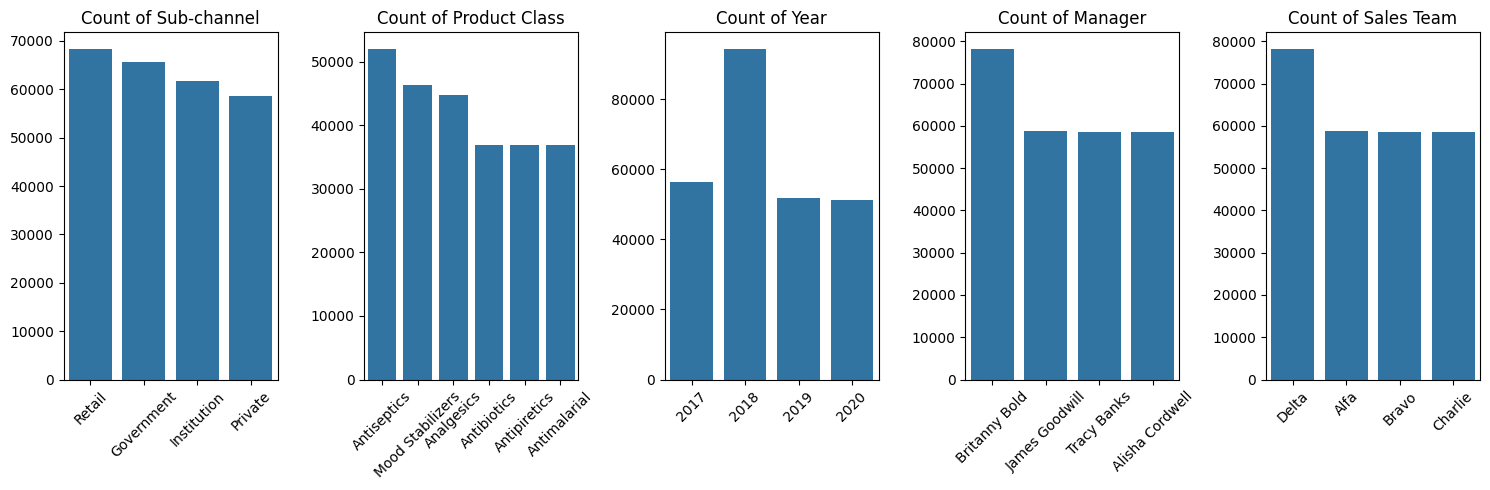

In [45]:
# bar plot
fig, axes = plt.subplots(1, len(bar_columns), figsize=(15, 5))

for i, c in enumerate(bar_columns):
  category_count = pharm_no_duplicate_df[c].value_counts()
  sns.barplot(x=category_count.index, y=category_count.values, ax=axes[i])
  axes[i].set_title(f"Count of {c}")
  axes[i].set_xlabel("")
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()

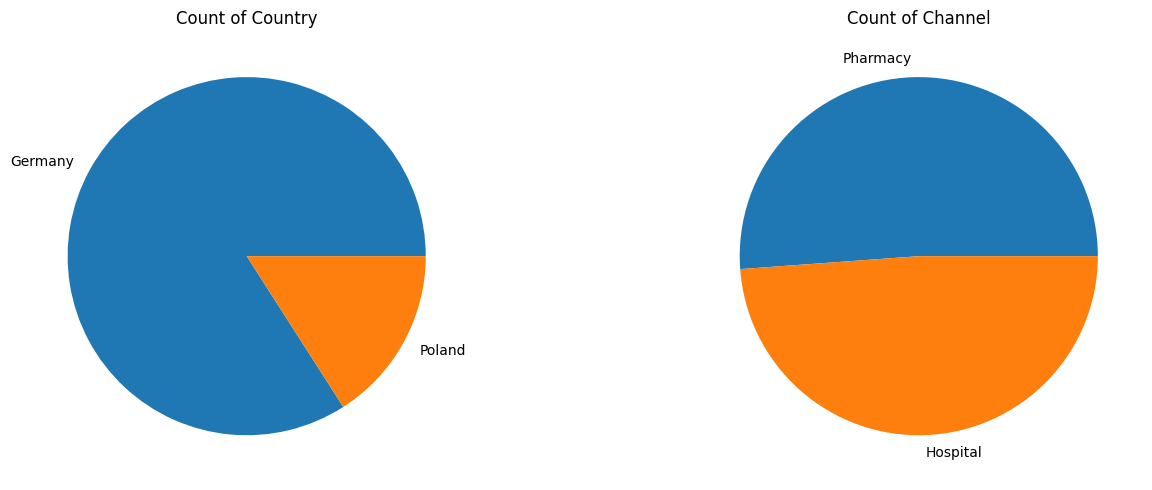

In [52]:
# bar plot
fig, axes = plt.subplots(1, len(pie_columns), figsize=(15, 5))

for i, c in enumerate(pie_columns):
  category_count = pharm_no_duplicate_df[c].value_counts()
  axes[i].pie(category_count.values, labels=category_count.index)
  axes[i].set_title(f"Count of {c}")
  axes[i].set_xlabel("")
  # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()

10. **CORRELATION OF ALL NUMERICAL COLUMNS**

In [53]:
pharm_no_duplicate_df = pharm_no_duplicate_df[numerical_columns].corr()
print(pharm_no_duplicate_df)


           Latitude  Longitude  Quantity     Price     Sales      Year
Latitude   1.000000   0.184926 -0.009793 -0.000583 -0.007704 -0.037050
Longitude  0.184926   1.000000 -0.038193 -0.000479 -0.033236 -0.139777
Quantity  -0.009793  -0.038193  1.000000 -0.000574  0.899370  0.014809
Price     -0.000583  -0.000479 -0.000574  1.000000  0.072517  0.001670
Sales     -0.007704  -0.033236  0.899370  0.072517  1.000000  0.012546
Year      -0.037050  -0.139777  0.014809  0.001670  0.012546  1.000000


11. **CORRELATION HEATMAP**

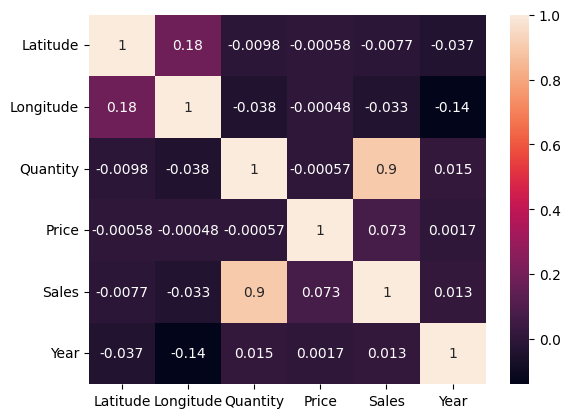

In [54]:
sns.heatmap(pharm_no_duplicate_df, annot=True, )
plt.show()